## Variable interactions

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
trainf = pd.read_csv('./Datasets/Car_features_train.csv')
trainp = pd.read_csv('./Datasets/Car_prices_train.csv')
testf = pd.read_csv('./Datasets/Car_features_test.csv')
testp = pd.read_csv('./Datasets/Car_prices_test.csv')
train = pd.merge(trainf,trainp)
train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,18473,bmw,6 Series,2020,Semi-Auto,11,Diesel,145,53.3282,3.0,37980
1,15064,bmw,6 Series,2019,Semi-Auto,10813,Diesel,145,53.0430,3.0,33980
2,18268,bmw,6 Series,2020,Semi-Auto,6,Diesel,145,53.4379,3.0,36850
3,18480,bmw,6 Series,2017,Semi-Auto,18895,Diesel,145,51.5140,3.0,25998
4,18492,bmw,6 Series,2015,Automatic,62953,Diesel,160,51.4903,3.0,18990


Until now, we have have assumed that the association between a predictor $X_j$ and response $Y$ does not depend on the value of other predictors. For example, the muliple linear regression model that we developed in Chapter [2](https://nustat.github.io/STAT303-2-class-notes/Lec2_MultipleLinearRegression.html) assumes that the average increase in price associated with a unit increase in engineSize is always $12,180, regardless of the value of other predictors. However, this assumption may be incorrect.

### Variable interaction between continuous predictors

We can relax this assumption by considering another predictor, called an interaction term. Let us assume that the average increase in `price` associated with a one-unit increase in `engineSize` depends on the model `year` of the car. In other words, there is an interaction between `engineSize` and `year`. This interaction can be included as a predictor, which is the product of `engineSize` and `year`. *Note that there are several possible interactions that we can consider. Here the interaction between `engineSize` and `year` is just an example.*

In [4]:
#Considering interaction between engineSize and year
ols_object = smf.ols(formula = 'price~year*engineSize+mileage+mpg', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2121.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        02:19:05   Log-Likelihood:                -52338.
No. Observations:                4960   AIC:                         1.047e+05
Df Residuals:                    4954   BIC:                         1.047e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.606e+05   2.74e+05      2.048      0.041     2.4e+04     1.1e+06
year             -275.3833    135.695     -2.029      0.042    -541.405      -9.361
engineSize      -1.796e+06   9.97e+04    -18.019      0.000   -1.99e+06    -1.6e+06
year:engineSize   896.7687     49.431     18.142      0.000     799.861     993.676
mileage            -0.1525      0.008    -17.954      0.000      -0.169      -0.136
mpg               -84.3417      9.048     -9.322      0.000    -102.079     -66.604
==============================================================================
Omnibus:                     2330.413   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29977.437
Skew:                           1.908   Prob(JB):                         0.00
Kurtosis:                      14.423   Cond. No.                     7.66e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.66e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that the R-squared has increased as compared to the model in Chapter [2](https://nustat.github.io/STAT303-2-class-notes/Lec2_MultipleLinearRegression.html) since we added a predictor.

The model equation is:

\begin{equation}
price = \beta_0 + \beta_1*year + \beta_2*engineSize + \beta_3*(year * engineSize) + \beta4*mileage + \beta_5*mpg,
\end{equation}or

\begin{equation}
price = \beta_0 + \beta_1*year + (\beta_2+\beta_3*year)*engineSize + \beta4*mileage + \beta_5*mpg,
\end{equation}or

\begin{equation}
price = \beta_0 + \beta_1*year + \tilde \beta*engineSize + \beta4*mileage + \beta_5*mpg,
\end{equation}

Since $\tilde \beta$ is a function of `year`, the association between `engineSize` and `price` is no longer a constant. A change in the value of `year` will change the association between `price` and `engineSize`.

Substituting the values of the coefficients:
\begin{equation}
price = 5.606e5 - 275.3833*year + (-1.796e6+896.7687*year)*engineSize -0.1525*mileage -84.3417*mpg
\end{equation}

Thus, for cars launched in the year 2010, the average increase in price for one liter increase in engine size is -1.796e6 + 896.7687 * 2010 $\approx$ \\$6,500, assuming all the other predictors are constant. However, for cars launched in the year 2020, the average increase in price for one liter increase in engine size is -1.796e6 + 896.7687*2020 $\approx$ \\$15,500 , assuming all the other predictors are constant.

Similarly, the equation can be re-arranged as:
\begin{equation}
price = 5.606e5 +(-275.3833+896.7687*engineSize)*year -1.796e6*engineSize -0.1525*mileage -84.3417*mpg
\end{equation}

Thus, for cars with an engine size of 2 litres, the average increase in price for a one year newer model is -275.3833+896.7687 * 2 $\approx$ \\$1500, assuming all the other predictors are constant. However, for cars with an engine size of 3 litres, the average increase in price for a one year newer model is -275.3833+896.7687 * 3 $\approx$ \\$2400, assuming all the other predictors are constant.

In [5]:
#Computing the RMSE of the model with the interaction term
pred_price = model.predict(testf)
np.sqrt(((testp.price - pred_price)**2).mean())

9423.598872501092

Note that the RMSE reduced as compared to that of the model in Chapter [2](https://nustat.github.io/STAT303-2-class-notes/Lec2_MultipleLinearRegression.html). This is because the interaction term between `engineSize` and `year` is significant and relaxes the assumption of constant association between price and engine size, and between price and year. This added flexibility makes the model better fit the data. Caution: Too much flexibility may lead to overfitting!

Note that interaction terms corresponding to other variable pairs, and higher order interaction terms (such as those containing 3 or 4 variables) may also be significant and improve the model fit & thereby the prediction accuracy of the model.

### Including qualitative predictors in the model

Let us develop a model for predicting `price` based on `engineSize` and the qualitative predictor `transmission`.

In [23]:
#checking the distribution of values of transmission
train.transmission.value_counts()

Manual       1948
Automatic    1660
Semi-Auto    1351
Other           1
Name: transmission, dtype: int64

Note that the *Other* category of the variable *transmission* contains only a single observation, which is likely to be insufficient to train the model. We'll remove that observation from the training data. Another option may be to combine the observation in the *Other* category with the nearest category, and keep it in the data.

In [24]:
train_updated = train[train.transmission!='Other']

In [25]:
ols_object = smf.ols(formula = 'price~engineSize+transmission', data = train_updated)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     1400.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        03:22:02   Log-Likelihood:                -53644.
No. Observations:                4959   AIC:                         1.073e+05
Df Residuals:                    4955   BIC:                         1.073e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  3042.6765    661.190      4.602      0.000    1746.451    4338.902
transmission[T.Manual]    -6770.6165    442.116    -15.314      0.000   -7637.360   -5903.873
transmission[T.Semi-Auto]  4994.3112    442.989     11.274      0.000    4125.857    5862.765
engineSize                 1.023e+04    247.485     41.323      0.000    9741.581    1.07e+04
==============================================================================
Omnibus:                     1575.518   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11006.609
Skew:                           1.334   Prob(JB):                         0.00
Kurtosis:                       9.793   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model equation is:

Automatic transmission: `price` = 3042.6765 + 1.023e4`engineSize`, 

Semi-Automatic transmission: `price` = 3042.6765 + 1.023e4`engineSize` + 4994.3112, 

Manual transmission: `price` = 3042.6765 + 1.023e4`engineSize` -6770.6165

In [49]:
#Visualizing the developed model with interaction terms
#sns.lineplot(x = x, y = model.params['engineSize']*x+model.params['Intercept'], color = 'red')
#sns.lineplot(x = x, y = model.params['engineSize']*x+model.params['Intercept']+model.params['transmission[T.Semi-Auto]'], color = 'blue')
#sns.lineplot(x = x, y = model.params['engineSize']*x+model.params['Intercept']+model.params['transmission[T.Manual]'], color = 'green')
#plt.legend(labels=["Automatic","Semi-Automatic", "Manual"])

### Including qualitative predictors and its interaction with continuous predictor in the model

Note that the qualitative predictor leads to fitting 3 parallel lines to the data, as there are 3 categories.

However, note that we have made the constant association assumption. The fact that the lines are parallel means that the average increase in car price for one litre increase in engine size does not depend on the type of transmission. This represents a potentially serious limitation of the model, since in fact a change in engine size may have a very different association on the price of an automatic car versus a semi-automatic or manual car.

This limitation can be addressed by adding an interaction variable by multiplying `engineSize` with the dummy variables for semi-automatic and manual transmissions. 

In [11]:
#Using the ols function to create an ols object. 'ols' stands for 'Ordinary least squares'
ols_object = smf.ols(formula = 'price~engineSize*transmission', data = train2)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     909.9
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        01:32:37   Log-Likelihood:                -53550.
No. Observations:                4959   AIC:                         1.071e+05
Df Residuals:                    4953   BIC:                         1.072e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             3754.7238    895.221      4.194      0.000    1999.695    5509.753
transmission[T.Manual]                1768.5856   1294.071      1.367      0.172    -768.366    4305.538
transmission[T.Semi-Auto]            -5282.7164   1416.472     -3.729      0.000   -8059.628   -2505.805
engineSize                            9928.6082    354.511     28.006      0.000    9233.610    1.06e+04
engineSize:transmission[T.Manual]    -5285.9059    646.175     -8.180      0.000   -6552.695   -4019.117
engineSize:transmission[T.Semi-Auto]  4162.2428    552.597      7.532      0.000    3078.908    5245.578
==============================================================================
Omnibus:                     1379.846   Durbin-Watson:                   0.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9799.471
Skew:                           1.139   Prob(JB):                         0.00
Kurtosis:                       9.499   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model equation for the model with interactions is:

Automatic transmission: $price = 3754.7238	 + 9928.6082 * engineSize$, \
Semi-Automatic transmission: $price = 3754.7238 + 9928.6082 * engineSize + (-5282.7164+4162.2428*engineSize)$, \
Manual transmission: $price = 3754.7238 + 9928.6082 * engineSize +(1768.5856-5285.9059*engineSize)$, or

Automatic transmission: $price = 3754.7238	 + 9928.6082 * engineSize$, \
Semi-Automatic transmission: $price = -1527 + 7046 * engineSize$, \
Manual transmission: $price = 5523 + 4642 * engineSize$,


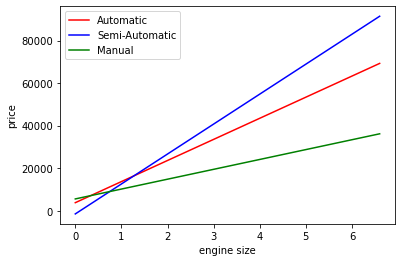

In [12]:
#Visualizing the developed model with interaction terms
x = np.linspace(-train.engineSize.min(),train.engineSize.max(),100)
plt.plot(x, model.params['engineSize']*x+model.params['Intercept'], '-r', label='Automatic')
plt.plot(x, (model.params['engineSize']+model.params['engineSize:transmission[T.Semi-Auto]'])*x+model.params['Intercept']+model.params['transmission[T.Semi-Auto]'], '-b', label='Semi-Automatic')
plt.plot(x, (model.params['engineSize']+model.params['engineSize:transmission[T.Manual]'])*x+model.params['Intercept']+model.params['transmission[T.Manual]'], '-g', label='Manual')
plt.legend(loc='upper left')
plt.xlabel('engine size')
plt.ylabel('price')
plt.show()

Note the interaction term adds flexibility to the model.

The slope of the regression line for semi-automatic cars is the largest. This suggests that increase in engine size is associated with a higher increase in car price for semi-automatic cars, as compared to other cars.

## Variable transformations

So far we have considered only a linear relationship between the predictors and the response. However, the relationship may be non-linear.

Consider the regression plot of *price* on *mileage*

<AxesSubplot:xlabel='mileage', ylabel='price'>

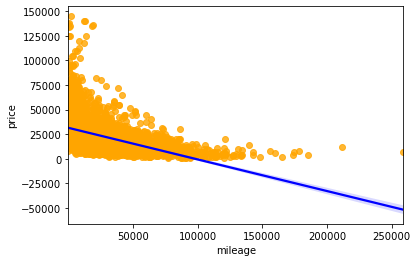

In [13]:
sns.regplot(x = train2.mileage, y =train2.price,color = 'orange', line_kws = {'color':'blue'})

It seems like a quadratic curve may better fit the points.

In [14]:
#Including mileage squared as a predictor and developing the model
ols_object = smf.ols(formula = 'price~mileage+I(mileage**2)', data = train2)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     920.6
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        01:32:40   Log-Likelihood:                -54382.
No. Observations:                4959   AIC:                         1.088e+05
Df Residuals:                    4956   BIC:                         1.088e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         3.44e+04    332.710    103.382      0.000    3.37e+04     3.5e+04
mileage            -0.5662      0.017    -33.940      0.000      -0.599      -0.534
I(mileage ** 2)  2.629e-06   1.56e-07     16.813      0.000    2.32e-06    2.94e-06
==============================================================================
Omnibus:                     2362.973   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22427.952
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      12.576   Cond. No.                     4.81e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='mileage', ylabel='price'>

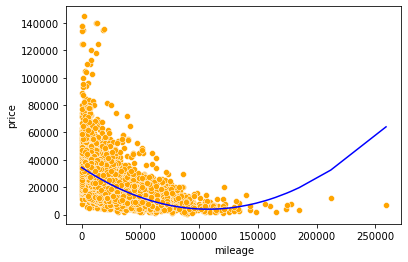

In [15]:
#Visualizing the regression line
pred_price = model.predict(train2)
sns.scatterplot(x = 'mileage', y = 'price', data = train2, color = 'orange')
sns.lineplot(x = train2.mileage, y = pred_price, color = 'blue')

In [16]:
#Including mileage squared as a predictor and developing the model
ols_object = smf.ols(formula = 'price~mileage+I(mileage**2)+I(mileage**3)', data = train2)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     652.3
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        01:32:50   Log-Likelihood:                -54340.
No. Observations:                4959   AIC:                         1.087e+05
Df Residuals:                    4955   BIC:                         1.087e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.598e+04    371.926     96.727      0.000    3.52e+04    3.67e+04
mileage            -0.7742      0.028    -27.634      0.000      -0.829      -0.719
I(mileage ** 2)  6.875e-06   4.87e-07     14.119      0.000    5.92e-06    7.83e-06
I(mileage ** 3) -1.823e-11   1.98e-12     -9.199      0.000   -2.21e-11   -1.43e-11
==============================================================================
Omnibus:                     2380.788   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23039.307
Skew:                           2.065   Prob(JB):                         0.00
Kurtosis:                      12.719   Cond. No.                     7.73e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.73e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that the fit seems slighty better for mileage less than 150k. The model should not be used to predict car prices of cars with a mileage higher than 150k.

Let's update the model created earlier (in the beginning of this chapter) to include the transformed predictor.

In [17]:
#Model with an interaction term and a variable transformation term
ols_object = smf.ols(formula = 'price~year*engineSize+mileage+mpg+I(mileage**2)', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1947.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        01:32:51   Log-Likelihood:                -52172.
No. Observations:                4960   AIC:                         1.044e+05
Df Residuals:                    4953   BIC:                         1.044e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         1.53e+06    2.7e+05      5.671      0.000       1e+06    2.06e+06
year             -755.6269    133.764     -5.649      0.000   -1017.864    -493.390
engineSize      -2.022e+06   9.72e+04    -20.807      0.000   -2.21e+06   -1.83e+06
year:engineSize  1008.6542     48.185     20.933      0.000     914.190    1103.118
mileage            -0.3548      0.014    -25.977      0.000      -0.382      -0.328
mpg               -54.7489      8.895     -6.155      0.000     -72.186     -37.311
I(mileage ** 2)  1.926e-06   1.04e-07     18.539      0.000    1.72e-06    2.13e-06
==============================================================================
Omnibus:                     2356.205   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38343.274
Skew:                           1.858   Prob(JB):                         0.00
Kurtosis:                      16.105   Cond. No.                     6.40e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that the R-squared has increased as compared to the model with just the interaction term.

In [18]:
#Computing RMSE on test data
pred_price = model.predict(testf)
np.sqrt(((testp.price - pred_price)**2).mean())

9074.485626191494

Note that the prediction accuracy of the model has further increased, as the RMSE has reduced. The transformed predictor is statisically significant and provides additional flexibility to better capture the trend in the data, leading to an increase in prediction accuracy.